# Ridge, Lasso Regression

In [12]:
#Boston Housing Dataset: Load the boston dataset.

from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

## RIDGE REGRESSION

The first type of regularized regression that we'll look at is called ridge regression 
in which our loss function is the standard OLS function plus the squared value of each coefficient 
multipled by some constant alpha

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

When minimizing the loss function to fit to our data, models are penalized for
coefficients with a large magnitude: large positive and large negative coefficients

NOTE that alpha is a parameter that we need to choose in order to fit and predict
essentially, we can select the alpha for which our model performs best (hyper parameter tuning)

alpha controls model complexity
Notice that when alpha=0 we get back OLS (large coeff no penalized - overfitting problem is not accounted for)
Very high alpha can lead to underfitting the data (model too simple)
alpha controls regularization strength; must be a positive float. 

Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
Larger values specify stronger regularization.

In [14]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Ridge
import numpy as np

regressor = Ridge()

parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}
#note that we set alpha using the argument alpha
#also notice the argument normalize: setting this equal to True ensures that all 
#our variables are on the same scale

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.750815 using {'alpha': 0.01, 'normalize': True}
0.750437 (0.027187) with: {'alpha': 0.001, 'normalize': True}
0.750365 (0.027331) with: {'alpha': 0.001, 'normalize': False}
0.750815 (0.026044) with: {'alpha': 0.01, 'normalize': True}
0.750360 (0.027245) with: {'alpha': 0.01, 'normalize': False}
0.747619 (0.022898) with: {'alpha': 0.1, 'normalize': True}
0.750144 (0.026547) with: {'alpha': 0.1, 'normalize': False}
0.678499 (0.018741) with: {'alpha': 1, 'normalize': True}
0.746292 (0.024488) with: {'alpha': 1, 'normalize': False}
0.356775 (0.011750) with: {'alpha': 10, 'normalize': True}
0.741891 (0.022716) with: {'alpha': 10, 'normalize': False}


0.7545640092372441

In [15]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

import pandas as pd
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  35.9620076848575


,features,estimatedCoefficients
0,CRIM,-0.118842
1,ZN,0.037341
2,INDUS,-0.058042
3,CHAS,0.036209
4,NOX,-13.739078
5,RM,3.380421
6,AGE,-0.021373
7,DIS,-1.321471
8,RAD,0.199138
9,TAX,-0.010891


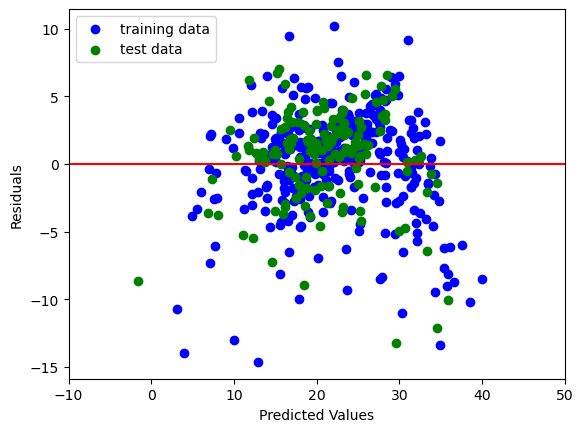

In [16]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [17]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.789130749853603
MSE train:  14.292419831753493
RMSE train:  3.7805316863840055
r2:  0.882931727535573
MAE test:  2.779523928105009
MSE test:  12.887265636889946
RMSE test:  3.589883791557875
r2:  0.868656439127256


## Lasso Regression

Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. 

$ \min_{w} ||X w - y||_2 ^ 2 + \alpha ||w||_1 $

In [18]:
    
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Lasso
import numpy as np

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

lasso_coef = gs.best_estimator_.coef_
print(lasso_coef)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(X_test, y_test)

[-1.23543893e-01  4.03924982e-02 -4.79678681e-02 -1.41348884e-02
 -1.43579832e+01  3.33433368e+00 -2.15567681e-02 -1.38227116e+00
  2.30620037e-01 -1.24536922e-02 -8.53384273e-01  6.89849426e-03
 -3.75655802e-01]
***GRIDSEARCH RESULTS***
Best score: 0.750385 using {'alpha': 0.001, 'normalize': False}
0.750141 (0.026834) with: {'alpha': 0.001, 'normalize': True}
0.750385 (0.027160) with: {'alpha': 0.001, 'normalize': False}
0.734151 (0.025641) with: {'alpha': 0.01, 'normalize': True}
0.750002 (0.025597) with: {'alpha': 0.01, 'normalize': False}
0.650653 (0.016342) with: {'alpha': 0.1, 'normalize': True}
0.740744 (0.022468) with: {'alpha': 0.1, 'normalize': False}
-0.000237 (0.000174) with: {'alpha': 1, 'normalize': True}
0.684590 (0.035048) with: {'alpha': 1, 'normalize': False}
-0.000237 (0.000174) with: {'alpha': 10, 'normalize': True}
0.555451 (0.013895) with: {'alpha': 10, 'normalize': False}


0.7541884038572224

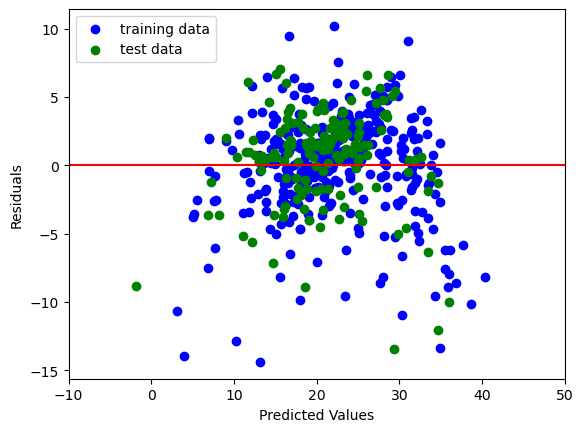

In [19]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [20]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.7957591398598542
MSE train:  14.275773377144368
RMSE train:  3.778329442643186
r2:  0.8830771049356778
MAE test:  2.775989964271174
MSE test:  12.90698779048258
RMSE test:  3.5926296483888485
r2:  0.8684402131737236
